In [1]:
library(readxl)
library(dplyr)

customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))

Warning message:
"package 'readxl' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
# 예약 번호(reserv_no)별로 매출 합계를 구함

total_amt <- order_info_r %>% 
group_by(reserv_no) %>% 
summarise(amt_daily = sum(sales/1000)) %>% 
arrange(reserv_no)

total_amt

reserv_no,amt_daily
2019060301,140
2019060601,152
2019060701,48
2019061601,105
2019061801,48
2019062001,10
2019062201,48
2019062601,8
2019062901,54
2019070101,50


In [3]:
head(order_info_r)

order_no,item_id,reserv_no,quantity,sales
191228137840110010,M0003,2019122805,1,17000
191228137837810010,M0001,2019122806,10,240000
191228547385810010,M0003,2019122807,2,34000
191228567831310010,M0008,2019122808,1,10000
191228567430310010,M0005,2019122809,4,140000
191228137860010010,M0005,2019122810,2,70000


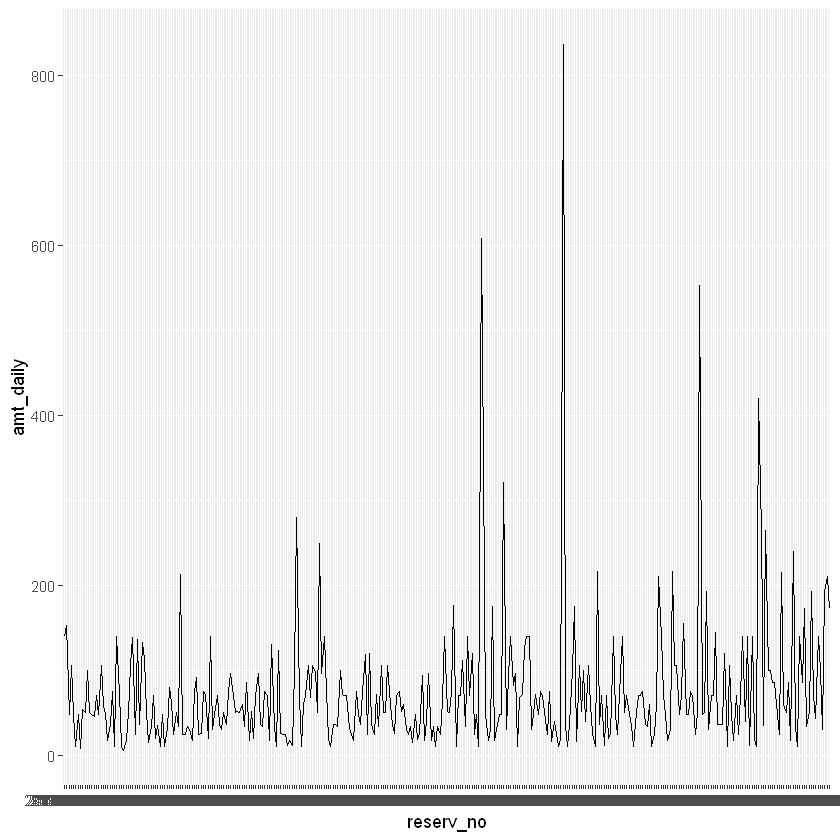

In [6]:
# 예약 번호(reserv_no) 순서를 x축으로 해서 선 그래프를 그림

library("ggplot2")
ggplot(total_amt, aes(x = reserv_no, y = amt_daily, group = 1)) + geom_line()

# 그룹을 지정합니다. 선 그래프를 그릴 때 그룹을 지정하지 않으면 오류가 생기면서 그래프가 그려지지 않습니다.

In [7]:
# 예약 번호(reserv_no) 1 ~ 6 번째 자리를 선택해서 (월로 만듦) 그룹핑

total_amt <- order_info_r %>% 
    mutate(month = substr(reserv_no, 1, 6)) %>% 
    group_by(month) %>% 
    summarise(amt_monthly = sum(sales/1000))

total_amt

month,amt_monthly
201906,613
201907,1744
201908,1622
201909,1586
201910,3333
201911,5197
201912,10862


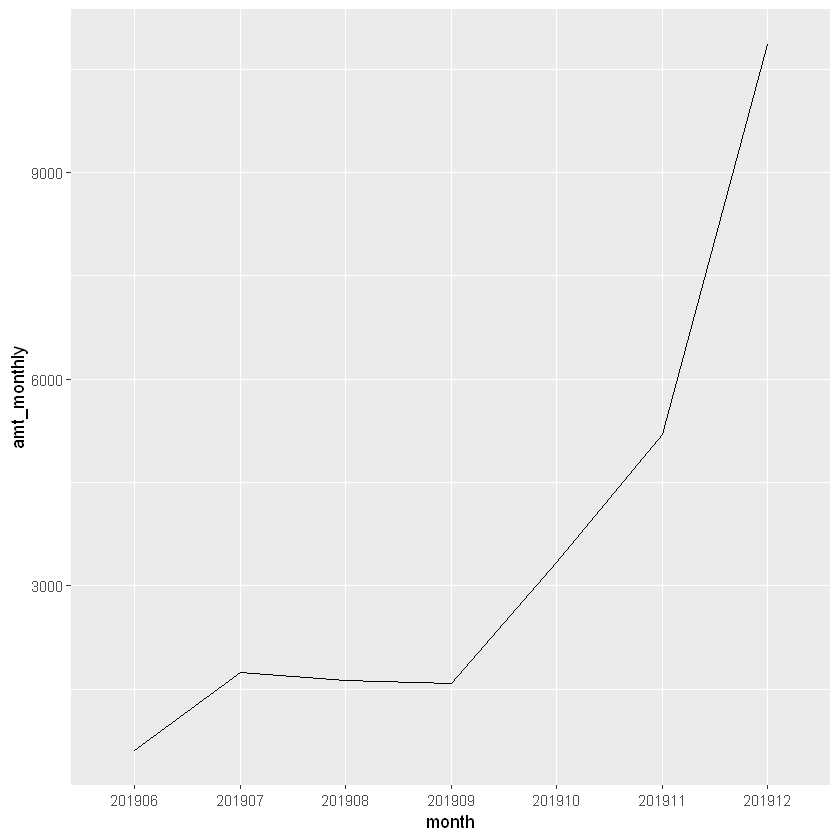

In [9]:
# 월별 전체 매출 선 그래프

ggplot(total_amt, aes(x = month, y = amt_monthly, group = 1)) + geom_line()

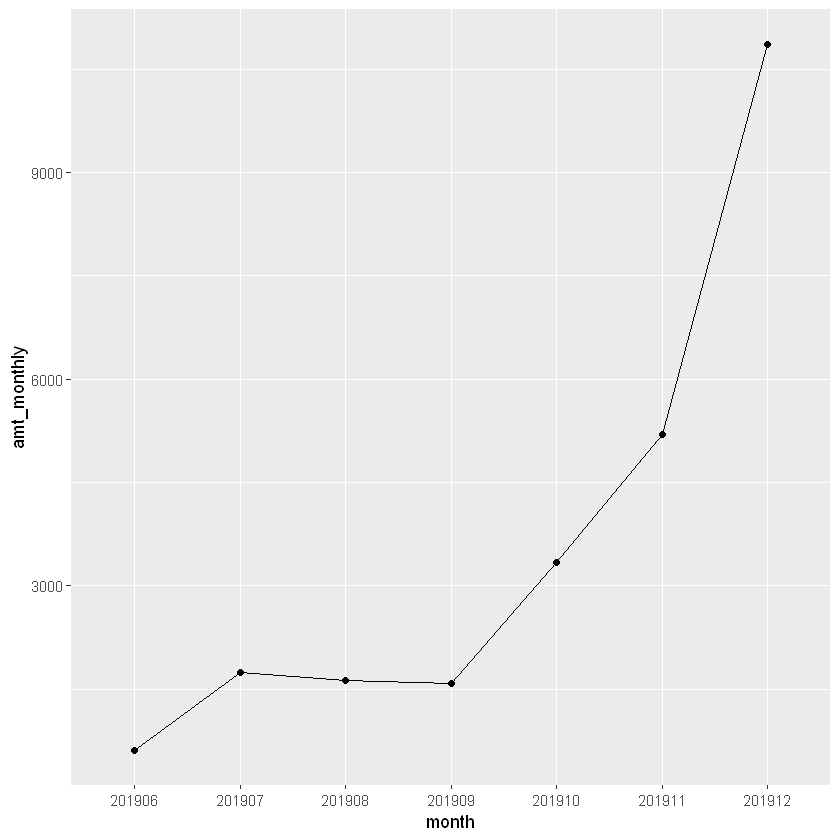

In [11]:
# 점 그리기

ggplot(total_amt, aes(x = month, y = amt_monthly, group = 1)) +
geom_line() +
geom_point()

# 선 그래프를 그립니다.
# 점 그래프를 그립니다.(겹침)

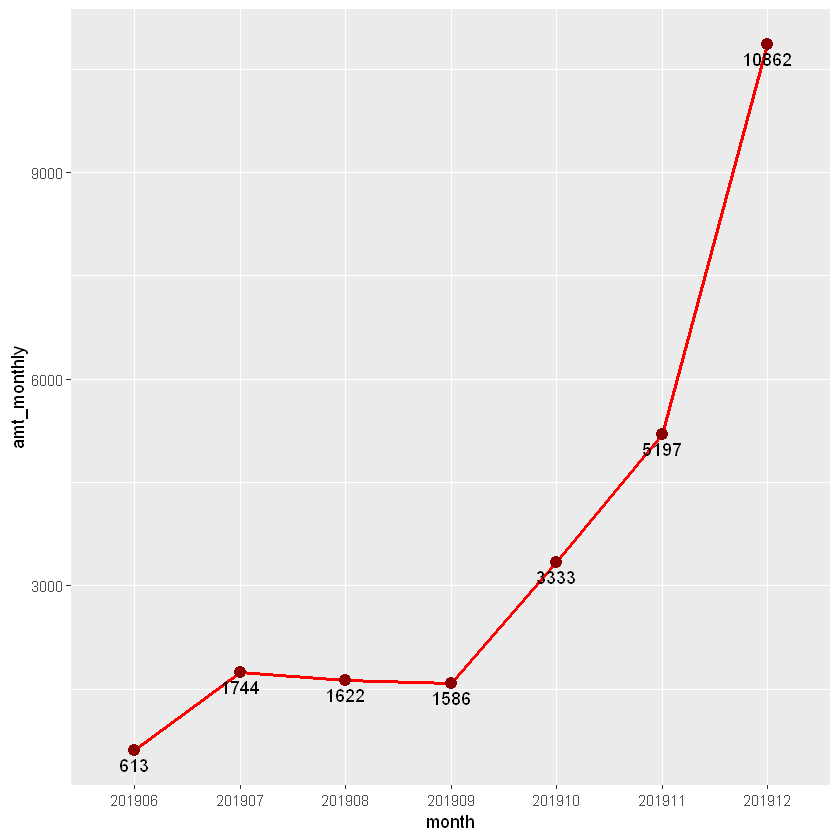

In [12]:
# 선 그래프 색상 추가, 레이블(텍스트 데이터) 추가

ggplot(total_amt, aes(x = month, y = amt_monthly, group = 1, label = amt_monthly)) +
geom_line(color = "red", size = 1) +
geom_point(color = "darkred", size = 3) +
geom_text(vjust = 1.5, hjust = 0.5)

# 레이블을 표현할 열을 지정
# 수직(vertical) 위치
# 수평(horizon) 위치

In [33]:
# 아이템 메뉴 이름 연결(조인)

df_boxplot_graph <- inner_join(order_info_r, item_r, by = "item_id")

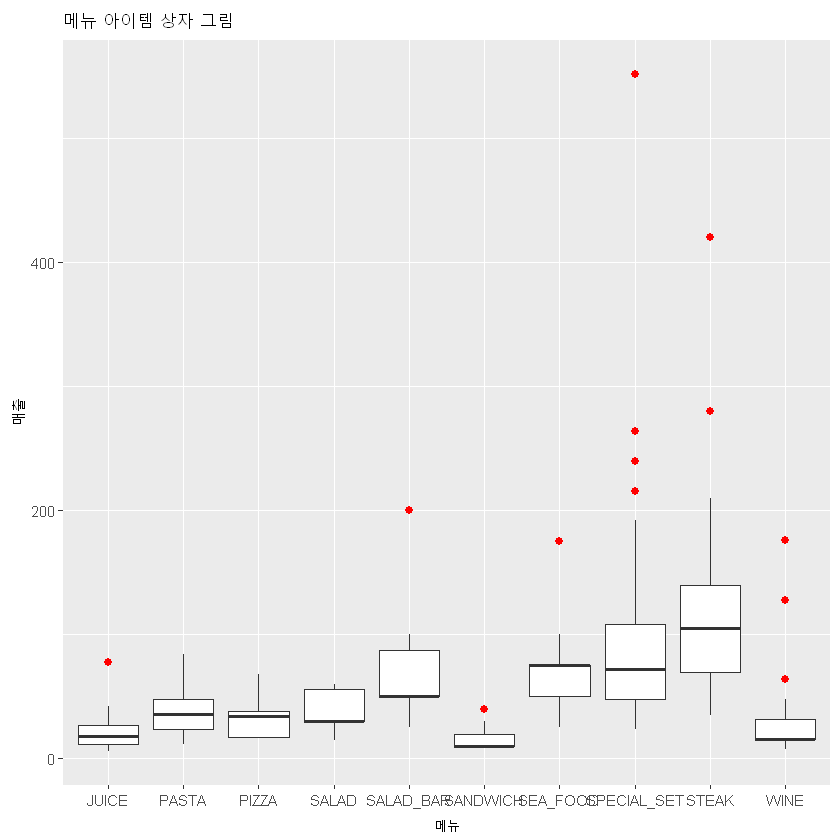

In [35]:
# 상자 그림 그리기

ggplot(df_boxplot_graph, aes(x = product_name, y = sales/1000)) +
    geom_boxplot(width = 0.8, outlier.size = 2, outlier.colour = "red") +
    labs(title = "메뉴 아이템 상자 그림", x = "메뉴", y = "매출")

In [14]:
tail(ToothGrowth)

,len,supp,dose
55,24.8,OJ,2
56,30.9,OJ,2
57,26.4,OJ,2
58,27.3,OJ,2
59,29.4,OJ,2
60,23.0,OJ,2


In [16]:
df <- ToothGrowth %>% 
    group_by(dose) %>%                        # 투여량별로 그룹화
    summarise(sd = sd(len), len = mean(len))  # 표준편차, 평균

df

dose,sd,len
0.5,4.499763,10.605
1.0,4.415436,19.735
2.0,3.774150,26.100


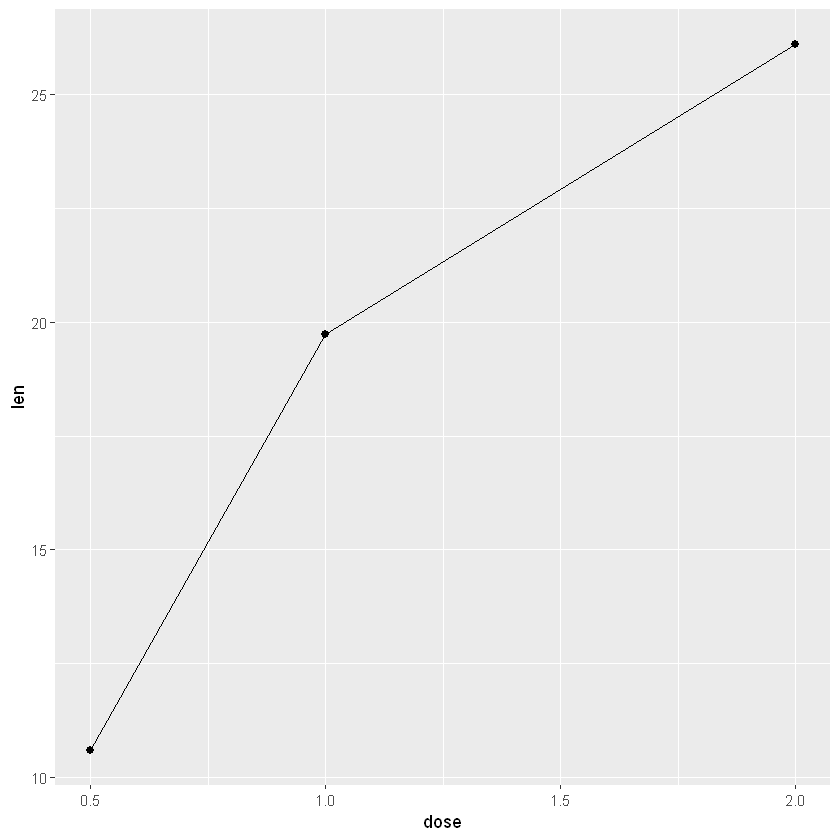

In [18]:
ggplot(df, aes(dose, len)) +
    geom_line(aes(group = 1)) +
    geom_point(size = 2)
# geom_line 그래프를 그릴때는 반드기 group을 지정해야 한다.

In [20]:
df2  <- ToothGrowth %>% 
    group_by(dose, supp) %>% 
    summarise(sd = sd(len), len = mean(len))

df2

dose,supp,sd,len
0.5,OJ,4.459709,13.23
0.5,VC,2.746634,7.98
1.0,OJ,3.910953,22.70
1.0,VC,2.515309,16.77
2.0,OJ,2.655058,26.06
2.0,VC,4.797731,26.14


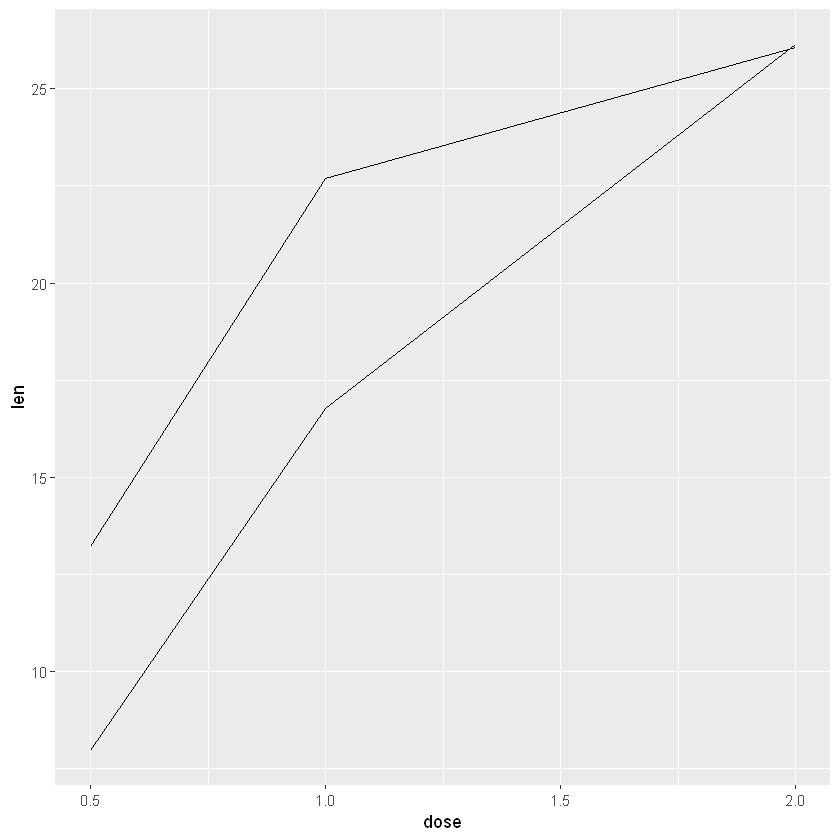

In [23]:
ggplot(df2, aes(dose, len)) +
    geom_line(aes(group = supp))

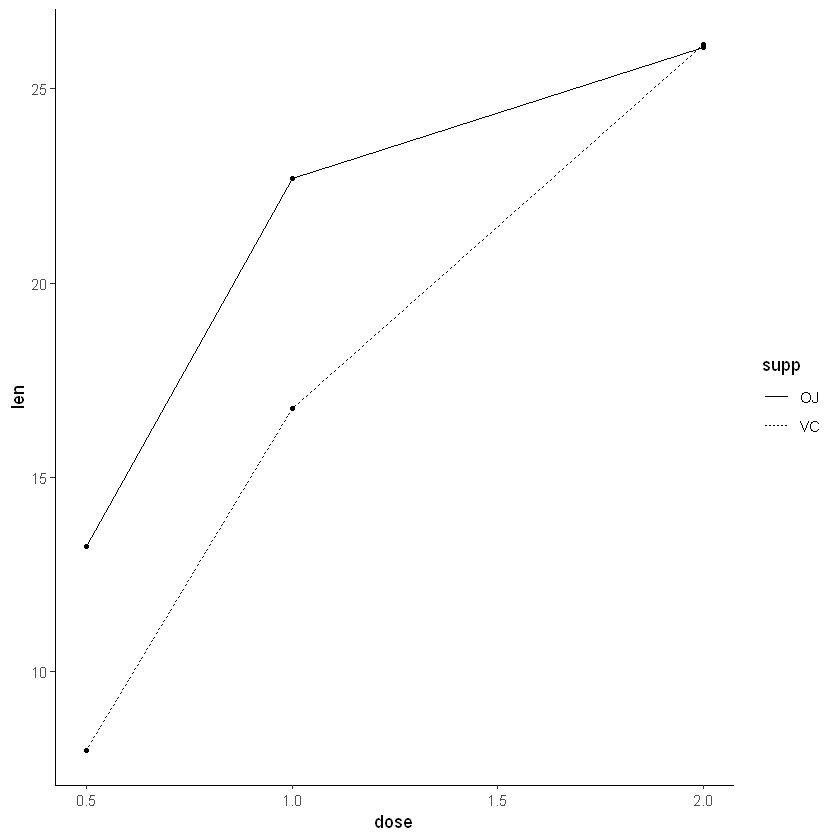

In [31]:
ggplot(df2, aes(dose, len)) +
    geom_line(aes(group = supp, linetype = supp)) +
    geom_point(size = 1) +
    theme_classic()